In [0]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
import math

In [0]:
def gen_fake_data():
    # First we generate the (x,y,z) tuples to imitate "real" data
    # Half of this will be in the + direction, half will be in the - dir.
    xy_max_error = 0.2

    # Generate the "real" x,y vectors
    x = np.linspace(min_x, max_x, dim_x)
    y = np.linspace(min_y, max_y, dim_y)

    # Apply an error to x,y
    x_err = (np.random.rand(*x.shape) - 0.5) * xy_max_error
    y_err = (np.random.rand(*y.shape) - 0.5) * xy_max_error
    x *= (1 + x_err)
    y *= (1 + y_err)

    # Generate fake z
    rows = []
    for ix in x:
        for iy in y:
            z = math.sqrt(ix**2 + iy**2)
            rows.append([ix,iy,z])

    mat = np.array(rows)
    return mat

(10000, 3)


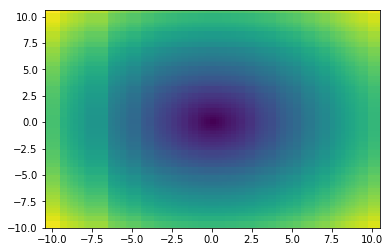

In [25]:
# min_? is minimum bound, max_? is maximum bound, 
#   dim_? is the granularity in that direction
min_x, max_x, dim_x = (-10, 10, 100)
min_y, max_y, dim_y = (-10, 10, 100)

mat = gen_fake_data()

x = np.unique(mat[:,0])
y = np.unique(mat[:,1])

X,Y = np.meshgrid(x, y)

# I'm fairly sure there's a more efficient way of doing this...
def get_z(mat, x, y):
    ind = (mat[:,(0,1)] == (x,y)).all(axis=1)
    row = mat[ind,:]
    return row[0,2]

z = np.array([get_z(mat,x,y) for (x,y) in zip(np.ravel(X), np.ravel(Y))])
Z = z.reshape(X.shape)
print(mat.shape)

plt.pcolormesh(X,Y,Z)
plt.xlim(min(x), max(x))
plt.ylim(min(y), max(y))
plt.show()